# Plot FD Amplitudes for Simple Comparison

In [48]:
# Setup enviroment to autoreload packages
%load_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib.pyplot import figure,plot,xlabel,ylabel,gca,show,close,axvline,xlim,ylim,savefig,legend,title

# Import select nrutils packages
from nrutils import scbuild,red,cyan,yellow,green,scsearch,gwylm,rgb,lim,pylim

# Others 
from numpy import array,pi
from kerr import leaver

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
# Look for simulations
A = scsearch(keyword='sxs',nonspinning=True,verbose=True,unique=True)
# A = scsearch(keyword='sxs',nonspinning=True,verbose=True,unique=True)

[scsearch]>> Found keyword (='sxs') keyword.
[scsearch]>> Found nonspinning (=True) keyword.
[scsearch]>> Found unique (=True) keyword.
[scsearch]>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 25 unique simulations:
[0001][sxs] SXS0201: qc-ns-q2.32	(SXS0201)
[0002][sxs] SXS0200: qc-ns-q3.27	(SXS0200)
[0003][sxs] SXS0199: qc-ns-q8.73	(SXS0199)
[0004][sxs] SXS0198: qc-ns-q1.20	(SXS0198)
[0005][sxs] SXS0197: ns-q5.52	(SXS0197)
[0006][sxs] SXS0196: qc-ns-q9.66	(SXS0196)
[0007][sxs] SXS0195: qc-ns-q7.76	(SXS0195)
[0008][sxs] SXS0194: qc-ns-q1.52	(SXS0194)
[0009][sxs] SXS0193: qc-ns-q3.50	(SXS0193)
[0010][sxs] SXS0192: qc-ns-q6.58	(SXS0192)
[0011][sxs] SXS0191: qc-ns-q2.51	(SXS0191)
[0012][sxs] SXS0190: qc-ns-q4.50	(SXS0190)
[0013][sxs] SXS0189: qc-ns-q9.17	(SXS0189)
[0014][sxs] SXS0188: qc-ns-q7.1

In [115]:
# Load selected waveform data from a simulation
y = gwylm( A[-1], lm=([2,2],[3,2],[4,4],[3,3]), verbose=False )

(gwylm)>> Found clean (=False) keyword.
(gwylm)>> Found lm (=([2, 2], [3, 2], [4, 4], [3, 3])) keyword.
(gwylm)>> Found load (=True) keyword.
(gwylm)>> Found lowpass (=False) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x107552830>) keyword.
(gwylm)>> Found verbose (=False) keyword.


In [116]:
# Collect Ringdown Frequencies for plotting
cw = []
for h in y.hlm:
    cw.append( leaver( y.xf, h.l, h.m, Mf=y.mf )[0] )

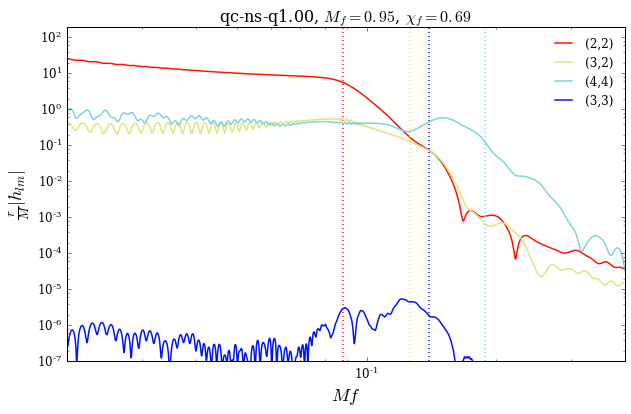

In [117]:
# Plot the Mode Amplitudes in the FD

fig = figure( figsize=2*array([5,3]) )
clr = rgb( len(y.hlm), jet=True )

for k,h in enumerate(y.hlm):
    plot( h.f, h.fd_amp, color=clr[k], linewidth=1.5, label='(%i,%i)'%(h.l,h.m) )
    axvline( x=cw[k].real/(2*pi), color = clr[k], linestyle=':', linewidth=1.5 )
    
xlim( [2e-2,4e-1] )
ylim( [ 1e-7, 2e2 ] )

xlabel('$Mf$')
ylabel(r'$\frac{r}{M} |h_{lm}|$')

title( '%s, $M_f = %1.2f$, $\chi_f = %1.2f$'%(y.label,y.mf,y.xf), fontsize=16 )

lg = legend( frameon=False )

gca().set_xscale("log", nonposx='clip')
gca().set_yscale("log", nonposy='clip')

savefig( '/Users/book/Desktop/sxs-'+y.label.replace('-','')+'.jpg' )